# Multivariate Exploratory Data Analysis

## Lesson Overview
Welcome to lesson three! Today, we will dive into creating, describing, and visualizing multivariate data relationships by using the Matplotlib, Pandas, and Seaborn libraries in Python.

By the end of this lesson you will be able to:
* Calculate the correlation coefficient 
* Construct a contingency table
* Practice importing dataframes
* Build plots to describe multiple variables within a single dataset

## Multivariate Non-Graphical

### Correlation Coefficient 

To calculate correlation we will make use of the corr() function. Again, we will follow the format dataframe.corr()

**Meanings**:
* 1: Full correlation. If one variable increases, so does the other
* 0: No correlation.
* -1: Full negative correlation. If one variable increases, the other decreases.

In [18]:
# Let's see the correlation for penguins' variables

penguins_corr = penguins.corr()
print(penguins_corr)

NameError: name 'penguins' is not defined

This table is quite confusing to look at, since it is showing us the correlation coefficient between **ALL** variables. So, if we want to look at two specific variables, we can use the same correlation table and indicate our variables by typing: correlationTable.loc["columnName", "columnName"]

In [ ]:
# Let's check the correlation between Culmen Length and Culmen Depth
culmen_corr = penguins_corr.loc["Culmen Length (mm)", "Culmen Depth (mm)"]
print(culmen_corr)

### Contingency Table

In [ ]:
# To Create a contingency table we can type pd.crosstab(dataframe["columnName1"], dataframe["columnName2"])

freq_three = pd.crosstab(penguins["Species"], penguins["Island"]).to_markdown()
print(freq_three)

In [ ]:
# If we want to see a table of proportions, we have to type
# pd.crosstab(dataframe["columnName1"], dataframe["columnName2"], normalize = True)

prop_one = pd.crosstab(penguins["Species"], penguins["Island"], normalize = True)
print(prop_one)

In [ ]:
# Verify that they add up to one

print(0.13 + 0.16 + 0.15+ 0.2 + 0.36)

## Multivariate Data Visualization

Now that we understand how Python can help us numerically analyze our multivariate data, let's see what Python's plotting tools can do to help visualize our data! Using the Matplotlib and Seaborn libraries for plot making, and the pandas library for importing data, we will learn how to create scatter plots, bar plots, linear model plots, and box plots to describe the relationships between variables in our dataset. 
  
We will practice loading libraries at the beginning of every new plot, but as a reminder, libraries only need to be imported once per Jupyter notebook. This repetition is meant to help you build the healthy habit of remembering to load your libraries at the beginning of your work. Additionally, one chunk produces only one plot. So all of the work you do in a chunk will only affect a single graph. Now, let's begin!

### Scatter plot

Scatter plots are a helpful way to visualize the relationship between two variables in statistics. Using the Matplotlib library, we can create scatter plots for the same Penguins dataset that we have been working with thus far.

In [ ]:
# As always, load libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create the data
df = pd.read_csv("penguins_wrangled.csv")

# Draw the scatter plot
plt.scatter(df["Flipper Length (mm)"], df["Body Mass (g)"], c = "blue", marker = "*", alpha = 0.5)

# Add x-axis and y-axix labels
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

# Add a title
plt.title("Flipper Length vs. Body Mass in Penguins")

# Display the graph
plt.show()

### lm plots
The lm plot displays the scattered data and fits a regression model onto it. It is exactly the same as putting the line of best fit onto our graph, and this process helps to understand the relationship between two variables. The method lmplot( ) takes the input of two column names (x and y) as a string and a DataFrame variable, and by default, fits the regression line. Let's try it out!

In [ ]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
df = pd.read_csv("penguins_wrangled.csv")

# Create the plot
sns.lmplot(x = "Culmen Depth (mm)", y = "Body Mass (g)", data = df)

# Add a title
plt.title("Culmen Depth vs. Body Mass")

# Display the plot
plt.show()

If we wanted to remove the regression line, we can set the parameter fig_reg to False within the lmplot( ) method.

In [ ]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
df = pd.read_csv("penguins_wrangled.csv")

# Create the plot
sns.lmplot(x = "Culmen Depth (mm)", y = "Body Mass (g)", data = df, fit_reg = False)

# Add a title
plt.title("Culmen Depth vs. Body Mass")

# Display the plot
plt.show()

Huh, doesn't the above scatterplot look interesting? There are two clusters of data, which might hint that something else is going on in our data. One would assume that there would be a strong, positive association between body mass and culmen depth in penguins, but here we see the opposite. This could be a result of the differences in penguin species, so let's go ahead and add it as another dimension to our plot!

In [ ]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
df = pd.read_csv("penguins_wrangled.csv")

# Create the plot
sns.lmplot(x = "Culmen Depth (mm)", y = "Body Mass (g)", hue = "Species", data = df)

# Add a title
plt.title("Culmen Depth vs. Body Mass for Species")

# Display the plot
plt.show()

### Box plot
Box plots, or box-and-whisker plots, are another helpful visualization to understand the distribution of our data. Let's practice making a box plot in Seaborn using the same dataset from our previous example!

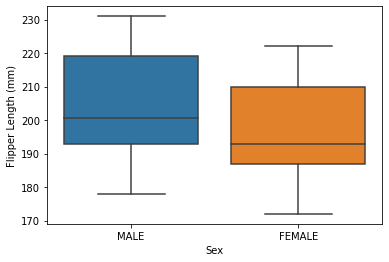

In [42]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
# We also do not need to create our dataframe more than once in a Jupyter notebook. 
# For the sake of practice, we'll do it again!
df = pd.read_csv("penguins_wrangled.csv")

# Create a box plot for the variables 'Body Mass (g)' and 'Sex'
sns.boxplot(x = "Sex", y = "Flipper Length (mm)", data = df)

# Display the plot
plt.show()

What if we wanted to compare flipper length by sex AND by species? We can add this to our box plot by adding color, using the hue parameter within sns.boxplot( ). Let's try it out!

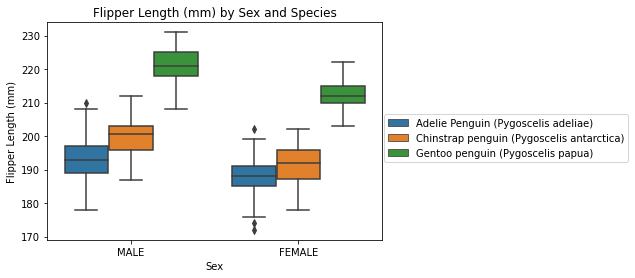

In [44]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
df = pd.read_csv("penguins_wrangled.csv")

# Create a box plot for the variables 'Body Mass (g)' and 'Sex'
sns.boxplot(x = "Sex", y = "Flipper Length (mm)", data = df, hue = "Species")

# Edits legend so that it does not block the box drawings
plt.legend(bbox_to_anchor = (1.75, 0.6))

# Add a title
plt.title("Flipper Length (mm) by Sex and Species")

# Display the plot
plt.show()